In [176]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))

In [139]:
from IPython.display import clear_output

import artm
import pandas as pd
import seaborn as sns

artm.version()

'0.10.0'

In [2]:
docs = pd.read_csv('docs_csv')

In [3]:
#train_sample_full = pd.read_csv('vw_train_sample_full')
#vw_test_sample_full = pd.read_csv('vw_test_sample_full')
#vw_test_sample_texts = pd.read_csv('vw_test_sample_texts')

In [4]:
docs.head()

,Unnamed: 0,category_id,card_id,description,name,parent_id,status,timestamp,worker_id,text,first,second,third
0,64,#,2be5c946-3836-4be7-9022-5ef80f398480,входит мойка шампунь протирка кузова коврики,мойка автомобилей снаружи от 300 р,/remont-avto/mojka,3,1575376946,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,мойка автомобилей снаружи от 300 р входит мойк...,remont-avto,mojka,NaN
1,65,4101,2e9ee73a-6599-4182-95db-e5af1a078e04,комплексная химчистка автомобиля от 3000 входи...,NaN,/remont-avto/mojka,3,1575376837,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,комплексная химчистка автомобиля от 3000 вход...,remont-avto,mojka,4101
2,66,#,a030f60b-afff-49bf-90be-7c4a9fd2d8aa,очищение кузова с последующим восстановлением ...,чистка кузова от нефтеорганики битума пескостр...,/remont-avto/mojka,3,1575378422,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,чистка кузова от нефтеорганики битума пескостр...,remont-avto,mojka,NaN
3,68,#,c4b5b42d-b890-48bc-b41e-e3eddb06b1f4,антидождь для защиты стёкол от дождя снега нал...,антидождь,/remont-avto/mojka,3,1575378583,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,антидождь антидождь для защиты стёкол от дождя...,remont-avto,mojka,NaN
4,69,#,d214c6bd-4f8c-417d-9245-1fcf049ee20b,входит наружняя мойка протирка кузова пылесос ...,комплексная уборка салона автомобиля,/remont-avto/mojka,3,1575490114,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,комплексная уборка салона автомобиля входит на...,remont-avto,mojka,NaN


In [90]:
card2rubric = {}
for index, row in docs.iterrows(): 
    card2rubric[row['card_id']] = [row['first'], row['second'], row['third']]

In [48]:
card2rubric_string = {}
for key, value in card2rubric.items():
    card2rubric_string[key] = str(value[0]) + "/" + str(value[1]) + "/" + str(value[2])

In [91]:
card2name = {}
for index, row in docs.iterrows(): 
    card2name[row['card_id']] = row['name']

In [95]:
card2text = {}
for index, row in docs.iterrows(): 
    card2text[row['card_id']] = row['text']

In [5]:
f = open('vw', 'r')
print(f.read(2000))

2be5c946-3836-4be7-9022-5ef80f398480 |text мойка автомобилей снаружи от 300 р входит мойка шампунь протирка кузова коврики |first remont-avto |second mojka |third 
2e9ee73a-6599-4182-95db-e5af1a078e04 |text  комплексная химчистка автомобиля от 3000 входит чистка сидений пол потолок двери панель мойка авто в подарок |first remont-avto |second mojka |third 4101
a030f60b-afff-49bf-90be-7c4a9fd2d8aa |text чистка кузова от нефтеорганики битума пескоструйки очищение кузова с последующим восстановлением лкп чистка кузова происходит с применением профессиональных средств |first remont-avto |second mojka |third 
c4b5b42d-b890-48bc-b41e-e3eddb06b1f4 |text антидождь антидождь для защиты стёкол от дождя снега наледи цена указана заполукруг на обычный легковой автомобиль |first remont-avto |second mojka |third 
d214c6bd-4f8c-417d-9245-1fcf049ee20b |text комплексная уборка салона автомобиля входит наружняя мойка протирка кузова пылесос салона влажная уборка чистка стекла |first remont-avto |second m

In [6]:
%matplotlib inline
import glob
import os
import matplotlib.pyplot as plt

import artm

In [7]:
batch_vectorizer = None
batch_vectorizer = artm.BatchVectorizer(data_path='./vw_only_remont-i-stroitel_stvo', 
                                        data_format='vowpal_wabbit',
                                        target_folder='vw_base_batches')

In [8]:
batch_vectorizer_train = None
batch_vectorizer_train = artm.BatchVectorizer(data_path='./vw_train_sample_full', 
                                        data_format='vowpal_wabbit',
                                        target_folder='folder_vw_train_sample_full')

In [9]:
batch_vectorizer_test = None
batch_vectorizer_test = artm.BatchVectorizer(data_path='./vw_test_sample_texts', 
                                        data_format='vowpal_wabbit',
                                        target_folder='folder_vw_test_sample_texts')

In [148]:
batch_vectorizer_castom = None
batch_vectorizer_castom = artm.BatchVectorizer(data_path='./vw_castom_sample_full', 
                                        data_format='vowpal_wabbit',
                                        target_folder='folder_vw_castom_sample_texts')

In [60]:
topic_number = 750

In [10]:
dictionary = artm.Dictionary()
dictionary.gather(data_path=batch_vectorizer_train.data_path)
topic_names = ['topic_{}'.format(i) for i in range(topic_number)]

model_plsa = artm.ARTM(topic_names=topic_names,
                        class_ids={'text': 1.0, 'first': 1.0, 'second': 1.0, 'third': 1.0},
                        cache_theta=True,
                        theta_columns_naming='title',
                        scores=[artm.PerplexityScore(name='PerplexityScore',
                                                        dictionary=dictionary)])

model_artm = artm.ARTM(topic_names=topic_names, cache_theta=True,
                       class_ids={'text': 1.0, 'first': 1.0, 'second': 1.0, 'third': 1.0},
                       scores=[artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary)],
                       regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta',
                                                                       tau=-0.15)])

model_plsa.initialize(dictionary=dictionary)
#model_artm.initialize(dictionary=dictionary)

In [11]:
model_plsa.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
model_plsa.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
model_plsa.scores.add(artm.TopicKernelScore(name='TopicKernelScore', class_id='text',
                                            probability_mass_threshold=0.3))

#model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
#model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
#model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', class_id='text',
#                                                  probability_mass_threshold=0.3))

In [12]:
model_artm.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.1))
#model_artm.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=1.5e+5))

In [13]:
model_plsa.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6, class_id='text'))
#model_artm.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=6, class_id='text'))

In [14]:
model_plsa.num_document_passes = 1
#model_artm.num_document_passes = 1

model_plsa.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)
#model_artm.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=15)

Sparsity Phi: nan (PLSA) vs. nan (ARTM)
Sparsity Theta: 0.005 (PLSA) vs. 0.005 (ARTM)
Kernel contrast: 0.773 (PLSA) vs. 0.773 (ARTM)
Kernel purity: 0.485 (PLSA) vs. 0.485 (ARTM)
Perplexity: 69.602 (PLSA) vs. 69.602 (ARTM)


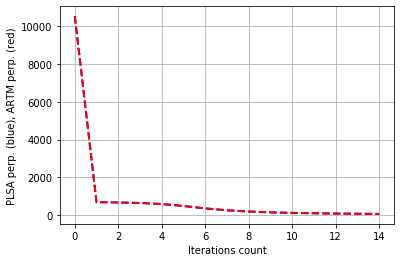

In [15]:
def print_measures(model_plsa, model_artm):
    print ('Sparsity Phi: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['SparsityPhiScore'].last_value,
        model_artm.score_tracker['SparsityPhiScore'].last_value))

    print ('Sparsity Theta: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['SparsityThetaScore'].last_value,
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print ('Kernel contrast: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['TopicKernelScore'].last_average_contrast,
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print ('Kernel purity: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['TopicKernelScore'].last_average_purity,
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print ('Perplexity: {0:.3f} (PLSA) vs. {1:.3f} (ARTM)'.format(
        model_plsa.score_tracker['PerplexityScore'].last_value,
        model_artm.score_tracker['PerplexityScore'].last_value))

    plt.plot(range(model_plsa.num_phi_updates),
             model_plsa.score_tracker['PerplexityScore'].value, 'b--',
             range(model_artm.num_phi_updates),
             model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel('PLSA perp. (blue), ARTM perp. (red)')
    plt.grid(True)
    plt.show()

print_measures(model_plsa, model_plsa)

In [16]:
for topic_name in model_plsa.topic_names[0:15]:
    print (topic_name + ': ',)
    print (model_plsa.score_tracker['TopTokensScore'].last_tokens[topic_name])

topic_0: 
['гаража', 'или', 'ручек', 'оконных', 'для', 'воздуховодов']
topic_1: 
['монтаж', 'кабинки', 'неточность', 'подстрижем', 'созданим', 'кустам']
topic_2: 
['по', '3', 'в', 'и', 'за', '6']
topic_3: 
['доме', 'квартире', 'в', 'будет', 'не', 'коттедже']
topic_4: 
['под', 'стяжка', 'укладку', 'плитки', 'разъёма', 'пола']
topic_5: 
['отделки', 'и', 'ни', 'видами', 'а', 'возможностью']
topic_6: 
['инструментом', 'до', '30', 'работу', 'мо', 'в']
topic_7: 
['и', 'отделочных', 'комплексный', 'санузла', 'частично', 'работ']
topic_8: 
['и', 'по', 'скидка', 'пенсионерам', 'профессиональное', 'оборудование']
topic_9: 
['замена', 'кнопок', 'гнезда', 'стартеров', 'наружного', 'оконных']
topic_10: 
['подбор', 'растворов', 'колеровка', 'и', 'комплексное', 'малярных']
topic_11: 
['3', '5', 'б', 'и', 'в', 'ж']
topic_12: 
['обоев', 'поклейка', 'жидких', 'барабан', 'диска', 'вращается']
topic_13: 
['установки', 'пожаротушения', 'автоматической', 'водяной', 'и', 'места']
topic_14: 
['умывальника', '

In [149]:
theta_castom = model_plsa.transform(batch_vectorizer=batch_vectorizer_castom)

In [150]:
theta_castom.shape

(750, 123865)

In [151]:
castom_card2topic = {}
for card_id in theta_castom.columns:
    clear_output(True)
    print(card_id)
    castom_card2topic[card_id] = theta_castom[card_id].argmax()
    

7bb87946-95aa-46b5-ba88-1b60aa24e560


In [66]:
thets_train = model_plsa.transform(batch_vectorizer=batch_vectorizer_train)

In [67]:
train_card2topic = {}
for card_id in thets_train.columns:
    train_card2topic[card_id] = thets_train[card_id].argmax()

In [17]:
theta_test = model_plsa.transform(batch_vectorizer=batch_vectorizer_test)

In [137]:
#thetaT = theta_test.T.drop_duplicates()
cards_top_topic = {}
for card_id in theta_test.columns:
    cards_top_topic[card_id] = theta_test[card_id].argmax()

In [152]:
card2topic = dict(list(cards_top_topic.items()) + list(train_card2topic.items()) + list(castom_card2topic.items()))

In [153]:
def show_docs_by_topic(n):
    docs_by_topic_n = [card_id for card_id, value in card2topic.items() if value==n]
    for i in range(20):
        if i < len(docs_by_topic_n) - 1:
            row = docs[docs['card_id'] == docs_by_topic_n[i]]
            print(str(row['first'].values), str(row['second'].values), str(row['third'].values), str(row['text'].values))
            #print(str(docs[docs['card_id'] == docs_by_topic_n[i]]['text'].values))
show_docs_by_topic(12)

['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['ogruntovka-sten'] [' прогрунтуем стены для дальнейшей окраски или поклейки обоев']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['nanesenie-jidkih-oboev'] ['нанесение жидких обоев ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['poklejka-oboev'] ['поклейка обоев ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['poklejka-oboev'] ['поклейка обоев ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['nanesenie-jidkih-oboev'] ['нанесение жидких обоев ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['demontaj-oboev'] ['демонтаж обоев ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['demontaj-oboev'] ['демонтаж обоев ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['demontaj-oboev'] ['демонтаж обоев ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['demontaj-oboev'] ['демонтаж обоев ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['demontaj-oboev'] ['демонтаж о

In [154]:
for i in range(5):
    print(i)
    show_docs_by_topic(i)
    print('\n\n\n\n')

0
['remont-i-stroitel_stvo'] ['stroitel_stvo-garajej'] ['montaj-vorot-dla-garaja'] ['монтаж ворот для гаража ']
['remont-i-stroitel_stvo'] ['stroitel_stvo-garajej'] ['montaj-vorot-dla-garaja'] ['монтаж ворот для гаража ']
['remont-i-stroitel_stvo'] ['stroitel_stvo-garajej'] ['montaj-vorot-dla-garaja'] ['монтаж ворот для гаража ']
['remont-i-stroitel_stvo'] ['stroitel_stvo-garajej'] ['demontaj-garaja'] ['демонтаж гаража ']
['remont-i-stroitel_stvo'] ['ventilazia'] ['montaj-vozduhovodov'] ['монтаж воздуховодов ']
['remont-i-stroitel_stvo'] ['okna-i-balkony'] ['ustanovka-ili-zamena-okonnyh-rucek'] ['установка или замена оконных ручек выезд мастера установим или заменим оконные ручки']
['remont-i-stroitel_stvo'] ['ventilazia'] ['montaj-vozduhovodov'] ['монтаж воздуховодов ']
['remont-i-stroitel_stvo'] ['stroitel_stvo-garajej'] ['montaj-vorot-dla-garaja'] ['монтаж ворот для гаража ']
['remont-i-stroitel_stvo'] ['stroitel_stvo-garajej'] ['demontaj-garaja'] ['демонтаж гаража ']
['remont-i-str

['remont-i-stroitel_stvo'] ['remont-kvartir-i-domov'] ['kapital_nyj-remont-doma'] [' ремонт в частном загородном доме и квартире']
['remont-i-stroitel_stvo'] ['master-na-cas'] ['master-na-vse-ruki'] [' любая мужская работа в доме квартире']
['remont-i-stroitel_stvo'] ['dorojnoe-stroitel_stvo'] ['demontaj-dorog'] [' все виды работ по демонтажу']
['remont-i-stroitel_stvo'] ['elektromontajnye-raboty'] ['pereborka-susestvuusego-raspredelitel_nogo-ustrojstva'] [' монтаж электрического щита в квартире коттедже деревянном доме на фото щит до и после монтажа']
['remont-i-stroitel_stvo'] ['remont-kvartir-i-domov'] ['kapital_nyj-remont-kvartiry'] ['капитальный ремонт квартиры капитальный ремонт существенно отличается от текущего и косметического ремонтов основы капитального ремонта квартиры полное выравнивание потолков и стен в квартире полная или частичная замена непригодных элементов пола замена водоканализационных внутренних коммуникаций замена всех дверей в квартире замена электроприборов уч

In [155]:
for i in range(1, 5):
    print(i)
    show_docs_by_topic(i * 10)
    print('\n\n\n\n')

1
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastvorov'] ['колеровка растворов ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastvorov'] ['колеровка растворов ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastvorov'] ['колеровка растворов ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastvorov'] ['колеровка растворов ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastvorov'] ['колеровка растворов ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastvorov'] ['колеровка растворов ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastvorov'] ['колеровка растворов ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastvorov'] ['колеровка растворов ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastvorov'] ['колеровка растворов ']
['remont-i-stroitel_stvo'] ['oboi-i-malarnye-raboty'] ['kolerovka-rastv

['remont-i-stroitel_stvo'] ['dveri-i-zamki'] ['demontaj-dvernoj-korobki'] [' демонтаж дверных коробок выезд в день вызова и любой район города работают вежливые трезвые и профессиональные мастера без вредных привычек работаем с физическими и юридическими лицами выезд специалиста для консультации работ бесплатно работаем без выходных и праздников звоните']
['remont-i-stroitel_stvo'] ['santehniceskie-raboty-i-otoplenie'] ['vrezka-krana-v-stoak'] [' врезка крана в стояк в новосибирске выезд в день вызова и любой район города работают вежливые трезвые и профессиональные мастера без вредных привычек работаем с физическими и юридическими лицами выезд специалиста для консультации работ бесплатно работаем без выходных и праздников']
['remont-i-stroitel_stvo'] ['krovel_nye-raboty'] ['montaj-krovli-iz-evrosifera'] [' монтаж кровли из еврошифера работают вежливые трезвые и профессиональные мастера без вредных привычек работаем с физическими и юридическими лицами выезд специалиста для консультации

In [156]:
for i in range(1, 5):
    print(i)
    show_docs_by_topic(i * 100)
    print('\n\n\n\n')

1
['remont-i-stroitel_stvo'] ['master-na-cas'] ['sborka-mebeli'] [' в зависимости от сложности сборки']
['remont-i-stroitel_stvo'] ['elektromontajnye-raboty'] ['zamena-knopok-i-vyklucatelej'] [' за точку']
['remont-i-stroitel_stvo'] ['elektromontajnye-raboty'] ['povesit-bra'] [' в зависимости от сложности работ от 150 руб']
['remont-i-stroitel_stvo'] ['elektromontajnye-raboty'] ['povesit-lyustru'] [' в зависимости от сложности']
['remont-i-stroitel_stvo'] ['master-na-cas'] ['santehniceskie-raboty'] [' стоимость рассчитывается в зависимости от проводимых работ то есть в зависимости от того какие именно работы необходимо выполнить']
['remont-i-stroitel_stvo'] ['elektromontajnye-raboty'] ['ustanovka-tochechnogo-svetilnika'] [' монтаж в готовое гнездо и готовыми коммуникация']
['remont-i-stroitel_stvo'] ['elektromontajnye-raboty'] ['zamena-rozetok-i-vyklucatelej'] [' осуществляем замену и перенос внутренних электроточек замену и перенос накладаных электроточек замену и перенос веревочных в

['remont-i-stroitel_stvo'] ['remont-ofisa'] ['kapital_nyj-remont-sklada'] ['капитальный ремонт склада ']
['remont-i-stroitel_stvo'] ['remont-ofisa'] ['kapital_nyj-remont-sklada'] ['капитальный ремонт склада ']
['remont-i-stroitel_stvo'] ['remont-ofisa'] ['kosmeticeskij-remont-sklada'] ['косметический ремонт склада ']
['remont-i-stroitel_stvo'] ['remont-ofisa'] ['kapital_nyj-remont-sklada'] ['капитальный ремонт склада ']
['remont-i-stroitel_stvo'] ['remont-ofisa'] ['kosmeticeskij-remont-sklada'] [' косметический ремонт склада профессионально в кратчайшие сроки']
['remont-i-stroitel_stvo'] ['remont-ofisa'] ['kapital_nyj-remont-sklada'] [' капитальный ремонт склада профессионально в кратчайшие сроки']
['remont-i-stroitel_stvo'] ['remont-ofisa'] ['kosmeticeskij-remont-sklada'] ['косметический ремонт склада ']
['remont-i-stroitel_stvo'] ['remont-ofisa'] ['kosmeticeskij-remont-sklada'] ['косметический ремонт склада ']
['remont-i-stroitel_stvo'] ['dveri-i-zamki'] ['ustanovka-rucki'] [' услуга

In [157]:
docs.head()

,Unnamed: 0,category_id,card_id,description,name,parent_id,status,timestamp,worker_id,text,first,second,third
0,64,#,2be5c946-3836-4be7-9022-5ef80f398480,входит мойка шампунь протирка кузова коврики,мойка автомобилей снаружи от 300 р,/remont-avto/mojka,3,1575376946,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,мойка автомобилей снаружи от 300 р входит мойк...,remont-avto,mojka,NaN
1,65,4101,2e9ee73a-6599-4182-95db-e5af1a078e04,комплексная химчистка автомобиля от 3000 входи...,NaN,/remont-avto/mojka,3,1575376837,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,комплексная химчистка автомобиля от 3000 вход...,remont-avto,mojka,4101
2,66,#,a030f60b-afff-49bf-90be-7c4a9fd2d8aa,очищение кузова с последующим восстановлением ...,чистка кузова от нефтеорганики битума пескостр...,/remont-avto/mojka,3,1575378422,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,чистка кузова от нефтеорганики битума пескостр...,remont-avto,mojka,NaN
3,68,#,c4b5b42d-b890-48bc-b41e-e3eddb06b1f4,антидождь для защиты стёкол от дождя снега нал...,антидождь,/remont-avto/mojka,3,1575378583,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,антидождь антидождь для защиты стёкол от дождя...,remont-avto,mojka,NaN
4,69,#,d214c6bd-4f8c-417d-9245-1fcf049ee20b,входит наружняя мойка протирка кузова пылесос ...,комплексная уборка салона автомобиля,/remont-avto/mojka,3,1575490114,7ee168a9-4ef6-4a6d-9343-88ce9ec4a15e,комплексная уборка салона автомобиля входит на...,remont-avto,mojka,NaN


In [158]:
theta_test.head()

,f1b25ad8-59d6-43b9-b613-606c4eca0082,02d23dc3-9d24-4388-96ab-c276ed08726e,0c4bf29e-fa89-4d01-8457-94b7a8317333,209132c4-8b3f-4560-a196-741a27bc2e23,32af61c4-476a-49ab-a1dc-f3ce837c2520,3625e41d-0208-47fd-96e4-6c4a91ebd9d9,3ad9ef65-b836-4c59-9759-a09d42b2de9d,3b221c99-2de4-4c5a-8eb1-dd9a3864cb0a,3b3a28f1-6821-41d6-add8-40700e82df54,7cd1db1b-77fa-40af-a1ad-92bcd73ef41d,...,0cf950df-d3ae-406a-8d1b-1170dd98969a,5090a159-7918-4ae0-885a-aa9b411c4399,8300ecb5-b758-4d55-9a6a-15757a00dee2,782ebf6f-6c28-4d65-8c43-db152e16f420,15b17813-3616-4586-8c8d-5e6b4a6326fb,4cde119d-1a2d-461d-b66a-102e037b5ac1,973f3045-286d-432e-8bda-bcf5705c79be,997bda5a-762e-4d8f-9bdf-1c446365a7d3,ace8e68d-a992-490c-8a0d-f0c97f7523e1,283d1514-f131-4c92-9816-81a503b0851c
topic_0,1.723203e-06,2.208749e-05,1.642200e-07,1.741446e-06,2.668551e-11,1.472498e-05,0.0,1.779035e-11,2.208748e-05,1.104374e-05,...,6.915493e-15,0.0,1.941205e-11,9.442528e-07,1.104374e-05,8.210996e-08,2.208748e-05,1.472499e-05,4.036978e-16,1.642199e-07
topic_1,6.932773e-12,4.267246e-02,1.760043e-12,1.396054e-11,4.736059e-16,2.844829e-02,0.0,3.157374e-16,4.267244e-02,2.133623e-02,...,0.000000e+00,0.0,3.157374e-16,2.413876e-09,2.133623e-02,8.800213e-13,4.267245e-02,2.844830e-02,5.080221e-16,1.760043e-12
topic_2,2.880548e-04,4.009180e-07,1.730509e-10,2.991346e-04,3.721587e-13,2.672788e-07,0.0,1.929787e-13,4.009179e-07,2.004616e-07,...,4.215629e-15,0.0,1.224329e-12,1.006212e-03,2.004590e-07,8.652555e-11,4.009179e-07,2.672796e-07,2.553732e-13,1.730509e-10
topic_3,8.370320e-05,3.420219e-09,2.611567e-10,9.465635e-05,1.683762e-10,2.280321e-09,0.0,1.121822e-10,3.420276e-09,1.715078e-09,...,4.579575e-13,0.0,1.122530e-10,4.542586e-05,1.710110e-09,1.305783e-10,3.420219e-09,2.280216e-09,1.754278e-13,2.611567e-10
topic_4,3.877263e-07,2.456586e-09,6.219733e-12,3.894589e-07,3.620181e-03,3.525201e-04,0.0,1.031751e-12,2.456586e-09,1.228817e-09,...,4.827847e-15,0.0,1.032278e-12,1.970681e-07,1.228293e-09,3.109866e-12,2.456586e-09,1.637725e-09,3.525185e-04,6.219732e-12


In [159]:
test_docs = set(theta_test.columns)

In [26]:
docs[docs['card_id'].map(lambda x: x in test_docs)].head()

,Unnamed: 0,category_id,card_id,description,name,parent_id,status,timestamp,worker_id,text,first,second,third
36,331,/remont-i-stroitel_stvo/okna-i-balkony/ostekle...,f4a36249-cc09-468b-93d6-b821900d11d5,NaN,остекление балконов и лоджий,/remont-i-stroitel_stvo/okna-i-balkony,3,1550908449,7ee55d0d-1418-484d-a277-ba323fb6f9cf,остекление балконов и лоджий,remont-i-stroitel_stvo,okna-i-balkony,osteklenie-balkonov-i-lodjij
58,784,/remont-i-stroitel_stvo/dveri-i-zamki/demontaj...,a8364fce-6ac6-4578-bff4-d58a33c491ed,NaN,демонтаж металлической двери,/remont-i-stroitel_stvo/dveri-i-zamki,3,1555171021,7ee880f5-68e5-4491-8e78-6e03f7ee35c7,демонтаж металлической двери,remont-i-stroitel_stvo,dveri-i-zamki,demontaj-metalliceskoj-dveri
59,791,/remont-i-stroitel_stvo/plitocnye-raboty/germe...,c23f17af-3953-4433-8a45-44e2e838c134,NaN,герметизация ванной,/remont-i-stroitel_stvo/plitocnye-raboty,3,1555171093,7ee880f5-68e5-4491-8e78-6e03f7ee35c7,герметизация ванной,remont-i-stroitel_stvo,plitocnye-raboty,germetizazia-vannoj
79,1032,/remont-i-stroitel_stvo/master-na-cas/sborka-m...,92fb1352-98fb-4a2a-b620-f6c0e560f88f,ysonentity,сборка мебели,/remont-i-stroitel_stvo/master-na-cas,3,1561029929,7eeab42f-b931-4afa-81cc-e691269e38e0,сборка мебели ysonentity,remont-i-stroitel_stvo,master-na-cas,sborka-mebeli
109,1314,/remont-i-stroitel_stvo/stroitel_stvo-garajej/...,7d46d2fb-fedd-47b8-a16f-aa87ed1a1331,NaN,внутренняя отделка стен и потолка,/remont-i-stroitel_stvo/stroitel_stvo-garajej,3,1536295978,7eed8141-40f9-4ef4-a75b-64fc573bee04,внутренняя отделка стен и потолка,remont-i-stroitel_stvo,stroitel_stvo-garajej,vnutrennaa-otdelka-sten-i-potolka


In [27]:
docs_list = docs[(docs['card_id'].map(lambda x: x in test_docs)) & (docs['third']=="demontaj-metalliceskoj-dveri")]['card_id']

In [160]:
def show_top_topic_for_documents(docs_list):
    hist = {}
    for doc in docs_list:
        topic = cards_top_topic[doc]
        if topic in hist:
            hist[topic] += 1
        else:
            hist[topic] = 1
    return hist

show_top_topic_for_documents(docs_list)

{30: 82, 196: 2, 73: 1, 508: 1, 723: 1, 40: 1, 332: 1, 349: 1, 628: 1, 210: 1}

In [161]:
def find_category(category):
    category_docs_list = docs[(docs['card_id'].map(lambda x: x in test_docs)) & (docs['third']==category)]['card_id']
    return show_top_topic_for_documents(category_docs_list)
find_category('demontaj-metalliceskoj-dveri')

{30: 82, 196: 2, 73: 1, 508: 1, 723: 1, 40: 1, 332: 1, 349: 1, 628: 1, 210: 1}

In [119]:
find_category('osteklenie-balkonov-i-lodjij')

{550: 170,
 65: 20,
 426: 3,
 229: 1,
 564: 2,
 506: 1,
 493: 1,
 462: 1,
 416: 1,
 294: 1,
 254: 2,
 683: 1,
 242: 5,
 366: 3,
 142: 1,
 61: 2,
 304: 1,
 252: 2,
 568: 1,
 225: 1,
 471: 1,
 628: 1,
 118: 1,
 81: 1,
 484: 1,
 712: 1,
 435: 1,
 289: 1,
 666: 1}

In [31]:
find_category('germetizazia-vannoj')

{467: 199, 408: 1, 250: 1, 173: 1}

In [162]:
category_list = list(docs[docs['card_id'].map(lambda x: x in test_docs)]['third'])

In [33]:
category_list[4]

'vnutrennaa-otdelka-sten-i-potolka'

In [34]:
for i in range(20):
    print(sorted(find_category(category_list[i]).items(), key=lambda item: -item[1]))
    print("")

[(550, 170), (65, 20), (242, 5), (426, 3), (366, 3), (564, 2), (254, 2), (61, 2), (252, 2), (229, 1), (506, 1), (493, 1), (462, 1), (416, 1), (294, 1), (683, 1), (142, 1), (304, 1), (568, 1), (225, 1), (471, 1), (628, 1), (118, 1), (81, 1), (484, 1), (712, 1), (435, 1), (289, 1), (666, 1)]

[(30, 82), (196, 2), (73, 1), (508, 1), (723, 1), (40, 1), (332, 1), (349, 1), (628, 1), (210, 1)]

[(467, 199), (408, 1), (250, 1), (173, 1)]

[(221, 215), (176, 17), (461, 11), (408, 3), (723, 2), (117, 2), (691, 2), (563, 2), (367, 2), (149, 1), (12, 1), (452, 1), (396, 1), (453, 1), (100, 1), (239, 1), (33, 1), (474, 1), (538, 1), (294, 1), (399, 1), (374, 1), (414, 1), (692, 1), (342, 1), (525, 1), (289, 1), (54, 1), (97, 1)]

[(666, 59), (587, 1), (696, 1), (356, 1)]

[(450, 69), (143, 1)]

[(473, 144), (536, 1), (600, 1), (367, 1), (538, 1), (85, 1), (134, 1), (622, 1), (724, 1), (624, 1)]

[(554, 221), (259, 1), (226, 1), (61, 1), (188, 1), (653, 1), (663, 1), (651, 1), (381, 1), (743, 1), (

In [35]:
for i in range(20):
    print(i)
    print(sorted(list(find_category(category_list[i]).values()), key=lambda x: -x))
    print(len(find_category(category_list[i])))
    print('diff_texts', docs[(docs['card_id'].map(lambda x: x in test_docs)) & (docs['third']==category_list[i])]['text'].unique().shape)
    print()

0
[170, 20, 5, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
29
diff_texts (101,)

1
[82, 2, 1, 1, 1, 1, 1, 1, 1, 1]
10
diff_texts (13,)

2
[199, 1, 1, 1]
4
diff_texts (15,)

3
[215, 17, 11, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
29
diff_texts (84,)

4
[59, 1, 1, 1]
4
diff_texts (6,)

5
[69, 1]
2
diff_texts (6,)

6
[144, 1, 1, 1, 1, 1, 1, 1, 1, 1]
10
diff_texts (16,)

7
[221, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
12
diff_texts (21,)

8
[364, 12, 10, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
71
diff_texts (139,)

9
[201, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
16
diff_texts (38,)

10
[162, 1, 1, 1, 1, 1, 1]
7
diff_texts (13,)

11
[186, 2, 1, 1, 1, 1, 1, 1, 1]
9
diff_texts (32,)

12
[189, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
16
diff_texts (17,)

13
[1

In [163]:
# для каждой темы определим, какая рубрика в ней преобладает
# для этого посчитаем для каждого документа, какая тема имеет наибольшее влияние на него, 
# будем говорить, что этот документ имеет такую тему, вспомним, что у каждого документа есть рубрика.
# для каждой темы найдем моду по рубрикам среди документов с такой темой

def rubric_for_topic(topic_num):
    #dict_cards_with_topic = {}
    cards_with_rubric = {}
    for key, value in card2topic.items():
        if value == topic_num:
            #dict_cards_prefer_topic[key] = card2rubric_string[key]
            if card2rubric_string[key] in cards_with_rubric:
                cards_with_rubric[card2rubric_string[key]] += 1
            else:
                cards_with_rubric[card2rubric_string[key]] = 1
    if len(cards_with_rubric) > 0:
        max_val = max(cards_with_rubric.values())
        for key, value in cards_with_rubric.items():
            if value == max_val:
                return key
    else:
        return None
    
rubric_for_topic(216)

'remont-i-stroitel_stvo/mebel_/sborka-tumb-i-komodov'

In [164]:
topic2rubric = {}
for num in range(topic_number):
    topic2rubric[num] = rubric_for_topic(num)

In [165]:
len(set(topic2rubric.values()))

467

In [166]:
topic2rubric

{0: 'remont-i-stroitel_stvo/okna-i-balkony/ustanovka-ili-zamena-okonnyh-rucek',
 1: None,
 2: 'remont-i-stroitel_stvo/zabory-i-ograjdenia/stroitel_stvo-zabora-iz-betonnyh-blokov',
 3: 'remont-i-stroitel_stvo/elektromontajnye-raboty/nan',
 4: 'remont-i-stroitel_stvo/plitocnye-raboty/stajka-pola-pod-ukladku-plitki',
 5: 'remont-i-stroitel_stvo/remont-kvartir-i-domov/cernovaa-otdelka',
 6: 'remont-i-stroitel_stvo/plitocnye-raboty/ukladka-keramogranita',
 7: 'remont-i-stroitel_stvo/remont-kvartir-i-domov/nan',
 8: 'remont-i-stroitel_stvo/remont-ofisa/kapital_nyj-remont-ofisov',
 9: 'remont-i-stroitel_stvo/elektromontajnye-raboty/zamena-knopok-i-vyklucatelej',
 10: 'remont-i-stroitel_stvo/oboi-i-malarnye-raboty/kolerovka-rastvorov',
 11: 'remont-i-stroitel_stvo/drugoe/nan',
 12: 'remont-i-stroitel_stvo/oboi-i-malarnye-raboty/poklejka-oboev',
 13: 'remont-i-stroitel_stvo/drugoe/montaj-vodanoj-avtomaticeskoj-ustanovki-pojarotusenia',
 14: 'remont-i-stroitel_stvo/santehniceskie-raboty-i-otople

In [167]:
card2topic

{'f1b25ad8-59d6-43b9-b613-606c4eca0082': 216,
 '02d23dc3-9d24-4388-96ab-c276ed08726e': 14,
 '0c4bf29e-fa89-4d01-8457-94b7a8317333': 164,
 '209132c4-8b3f-4560-a196-741a27bc2e23': 122,
 '32af61c4-476a-49ab-a1dc-f3ce837c2520': 415,
 '3625e41d-0208-47fd-96e4-6c4a91ebd9d9': 204,
 '3ad9ef65-b836-4c59-9759-a09d42b2de9d': 370,
 '3b221c99-2de4-4c5a-8eb1-dd9a3864cb0a': 121,
 '3b3a28f1-6821-41d6-add8-40700e82df54': 536,
 '7cd1db1b-77fa-40af-a1ad-92bcd73ef41d': 134,
 'abc65d57-aa55-43c1-8bfd-7f21ecda7cd4': 217,
 'ba2bd04f-d687-400f-a18f-a1d16dab3d5d': 278,
 'bc5f6e7c-ca82-4bc7-bfe8-89268f32cfba': 102,
 'bc7d45fb-43bb-4d1a-bd6b-50dd1742e2cd': 485,
 'f59eec25-33cd-4186-9ee8-cd8778d70bfb': 570,
 'f703890f-4350-465c-8cb7-3c18b0af4a74': 21,
 'fba062a7-6fd0-430e-948a-af04688f6932': 434,
 '3b3eafe6-d544-4eb6-bd85-835894c4843a': 25,
 '3ff70756-3d14-4a82-9d30-30a79153f5ec': 552,
 '67f527f9-d56b-4aaa-a4b2-a4617617fa88': 583,
 '9bc59979-e93d-44d4-81b8-fa9ca5f666a7': 196,
 'a9378cb9-c50c-46ea-8ead-532a7679b3e

In [168]:
card2rubric_string

{'2be5c946-3836-4be7-9022-5ef80f398480': 'remont-avto/mojka/nan',
 '2e9ee73a-6599-4182-95db-e5af1a078e04': 'remont-avto/mojka/4101',
 'a030f60b-afff-49bf-90be-7c4a9fd2d8aa': 'remont-avto/mojka/nan',
 'c4b5b42d-b890-48bc-b41e-e3eddb06b1f4': 'remont-avto/mojka/nan',
 'd214c6bd-4f8c-417d-9245-1fcf049ee20b': 'remont-avto/mojka/nan',
 '03ba00b5-88c4-46f5-9536-cc778d7d6d5e': 'remont-i-ustanovka-tehniki/stiral_nye-masiny/zamena-podsipnikov',
 '09960334-1ffe-4fa9-8283-d2ab01bb8223': 'remont-i-ustanovka-tehniki/stiral_nye-masiny/zamena-nagrevatel_nogo-elementa',
 '16a6a746-6e14-4e46-93c1-58f1d9179695': 'remont-i-ustanovka-tehniki/posudomoecnye-masiny/zamena-slivnogo-nasosa',
 '283335fd-4bf9-40b9-8cc2-66e71cc6028e': 'remont-i-ustanovka-tehniki/posudomoecnye-masiny/nan',
 '2ed6503e-e471-438f-9389-e592478ba498': 'remont-i-ustanovka-tehniki/melkaa-bytovaa-tehnika/remont-pylesosa',
 '2f0942ca-8de9-4980-b3b3-9d908b8f9f7f': 'remont-i-ustanovka-tehniki/stiral_nye-masiny/nan',
 '42f06189-fdfe-4e48-9b39-

In [169]:
# accuracy точность на тестовой выборке
n = 0
pos = 0
for key, value in cards_top_topic.items():
    n += 1

    if topic2rubric[value] == card2rubric_string[key]:
        pos += 1
    else:
        if n % 1000 == 0:
            print("prediction: \t", topic2rubric[value], "!= \n", "val \t\t", card2rubric_string[key], "\n on ", card2text[key], "\n")
print(pos, " / ", n, pos/n)

prediction: 	 remont-i-stroitel_stvo/dveri-i-zamki/montaj-dvernoj-furnitury != 
 val 		 remont-i-stroitel_stvo/dveri-i-zamki/ustanovka-dvernoj-korobki 
 on  установка дверной коробки  

prediction: 	 remont-i-stroitel_stvo/santehniceskie-raboty-i-otoplenie/montaj-ekrana-dla-vannoj != 
 val 		 remont-i-stroitel_stvo/santehniceskie-raboty-i-otoplenie/montaj-ekrana-na-radiator-otoplenia 
 on  монтаж экрана на радиатор отопления  

prediction: 	 remont-i-stroitel_stvo/mebel_/sborka-krovati != 
 val 		 remont-i-stroitel_stvo/mebel_/sborka-stola 
 on  сборка стола  

prediction: 	 remont-i-stroitel_stvo/elektromontajnye-raboty/ustanovka-rozetok-i-vyklucatelej != 
 val 		 remont-i-stroitel_stvo/elektromontajnye-raboty/zamena-rozetok-i-vyklucatelej 
 on  замена розеток и выключателей замена и монтаж розеток и выключателей любой сложности квалифицированным электриком 

prediction: 	 remont-i-stroitel_stvo/oboi-i-malarnye-raboty/poklejka-oboev != 
 val 		 remont-i-stroitel_stvo/oboi-i-malarnye-r

In [170]:
castom_card2topic

{'82d22726-ed88-4134-b7b0-40d79bbff1ec': 490,
 '950d47dc-4c4e-417d-b1d0-5a858c860035': 490,
 '986fa2a7-042b-455f-95bd-905bf63639e0': 490,
 '9d922803-6034-4176-9d4f-079148fe66c7': 490,
 'a2836101-b869-44e7-83db-70fe1c6b049d': 490,
 'cec9c0be-60e4-4909-9a32-0d79a2e679f9': 490,
 'd11ba48c-3983-4063-8f52-a906d23c376a': 490,
 'd3a1fc41-16d9-40e7-9c76-85bacb3cfe2a': 490,
 'e6017b00-f82e-4c87-8bde-f1f81226e60d': 490,
 '442ed622-fda6-417b-9456-f26d41dd2f49': 273,
 '6b9d7a29-f07d-4fe6-a739-78bfd07e7622': 273,
 'f5053295-59ad-4d2b-8e43-8d002fc70247': 436,
 'd433ca08-40b0-4abf-b7c3-6aa938c5163a': 239,
 '050091dc-dd05-4fe9-bb30-c37761de536e': 181,
 '3885054d-4bb1-477d-9854-1f4e3dd53af3': 181,
 '88a1ac37-86af-4240-a707-9b96b4440d96': 642,
 'b815f24a-7bd7-44ef-9af6-0ebed64889c9': 181,
 '17fea6e3-6c91-494a-a4d9-9678841e5933': 125,
 '691821b7-db31-49b5-b235-ebbc1aa7b776': 125,
 '9369a5a8-1da9-4dc9-af9d-3d4b5f6b90d6': 151,
 'a85b16f5-9ad9-4db8-acaa-bb408947371d': 125,
 'c08ab91e-ee3d-4da1-ac0f-8348b65a

In [174]:
# посмотрим как классифицировались кастомные услуги
f = open("разметка_кастомных_услуг.csv", 'w')
n = 0
pos = 0
for key, value in castom_card2topic.items():
    n += 1

    if topic2rubric[value] == card2rubric_string[key]:
        pos += 1
    else:
        if n % 1000 == 0:
            print(n / 1000, " prediction: \t", topic2rubric[value], "\t настоящий: \t ", card2rubric_string[key], "\n name: ", card2name[key], "\n", card2text[key], "\n")
            f.write(str(topic2rubric[value]) + "\t" + str(card2name[key]) + "\t" + str(card2text[key]) + '\n')
f.close()
print(pos, " / ", n, pos/n)

2.0  prediction: 	 remont-i-stroitel_stvo/elektromontajnye-raboty/nan 	 настоящий: 	  remont-i-stroitel_stvo/plitocnye-raboty/nan 
 name:  укладка пвх плитки на фанеру 
 укладка пвх плитки на фанеру укладка пвх плитки на фанеру низкие цены на все виды услуг звоните выезд мастера бесплатно даем гарантию на все виды работ только опытные мастера и качественные работы 

3.0  prediction: 	 remont-i-stroitel_stvo/stroitel_stvo-ban_,-saun-i-bassejnov/stroitel_stvo-infrakrasnoj-sauny 	 настоящий: 	  remont-i-stroitel_stvo/betonnye-raboty/nan 
 name:  бетон для цокольного этажа 
 бетон для цокольного этажа бетон для цокольного этажа для вас низкие цены высокое качество отгрузка в течении часа после звонка оптовикам скидки 

4.0  prediction: 	 remont-i-stroitel_stvo/okna-i-balkony/uteplenie-balkonov-i-lodjii 	 настоящий: 	  remont-i-stroitel_stvo/okna-i-balkony/nan 
 name:  пластиковые и алюминиевые окна 
 пластиковые и алюминиевые окна изготовим и установим пластиковые и алюминиевые окна двери 

70.0  prediction: 	 remont-i-stroitel_stvo/plitocnye-raboty/stajka-pola-pod-ukladku-plitki 	 настоящий: 	  remont-i-stroitel_stvo/poly-i-napol_nye-pokrytia/nan 
 name:  стяжка пола механизированная 
 стяжка пола механизированная стяжка пола до 300 м 2 за 1 день 

72.0  prediction: 	 remont-i-stroitel_stvo/krovel_nye-raboty/montaj-krovli-iz-metallocerepizy 	 настоящий: 	  remont-i-stroitel_stvo/krovel_nye-raboty/nan 
 name:  монтаж листов металлочерепицы 
 монтаж листов металлочерепицы  

73.0  prediction: 	 remont-i-stroitel_stvo/oboi-i-malarnye-raboty/pokraska-sten 	 настоящий: 	  remont-i-stroitel_stvo/remont-kvartir-i-domov/nan 
 name:  покраска потолков в 2 слоя 
 покраска потолков в 2 слоя  

74.0  prediction: 	 remont-i-stroitel_stvo/santehniceskie-raboty-i-otoplenie/gidroizolazia-svov 	 настоящий: 	  remont-i-stroitel_stvo/fasadnye-raboty/nan 
 name:  монтаж иск камня без заполнения швов 
 монтаж иск камня без заполнения швов  

75.0  prediction: 	 remont-i-stroitel_stvo/drugoe/

In [172]:
n

123865

In [173]:
len(castom_card2topic)

123865